In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

 ## Exploratory Analysis
 

In [27]:
df = pd.read_csv('cs-training.csv', delimiter=',')
df.set_index(df.columns[0],inplace=True)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 150000 rows and 11 columns


In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


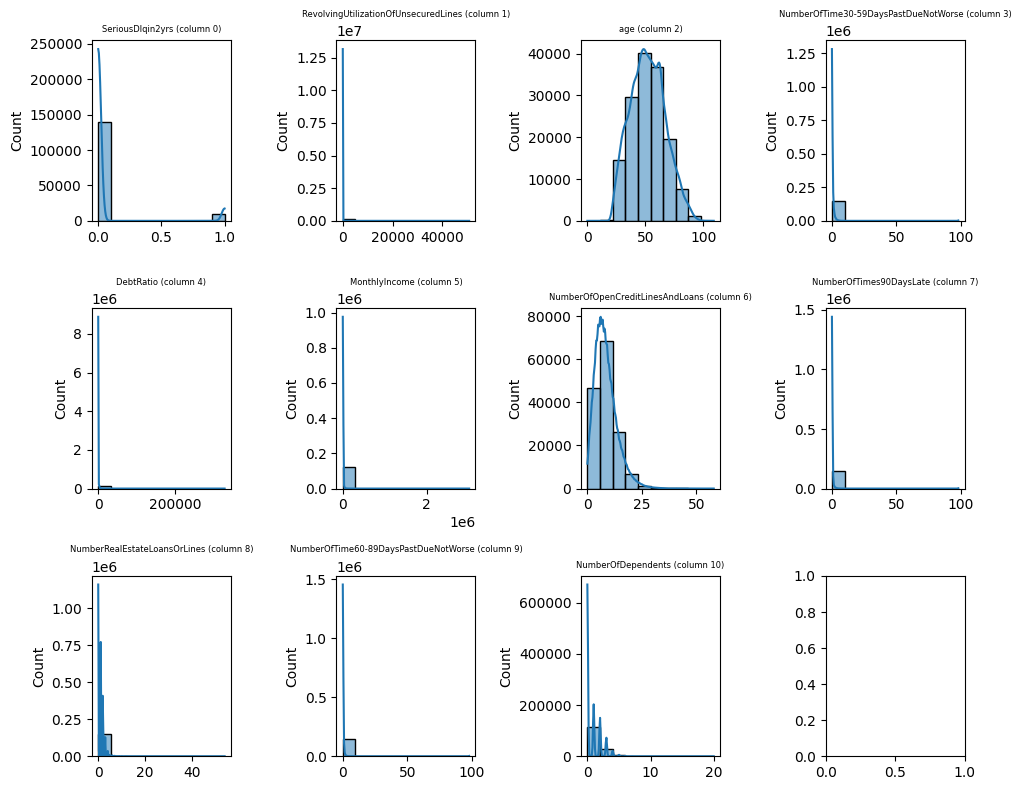

In [33]:
#Histo
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))  
axes = axes.flatten()  

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i],bins= 10)
    axes[i].set_title(f'{column} (column {i})', size=6)  
    axes[i].set_xlabel("") 

plt.tight_layout()
plt.show()


In [6]:
#Correlation matrix
df_nonan = df.dropna(axis= 1)
df_nonan = df_nonan[[col for col in df_nonan if df_nonan[col].nunique() > 1]]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


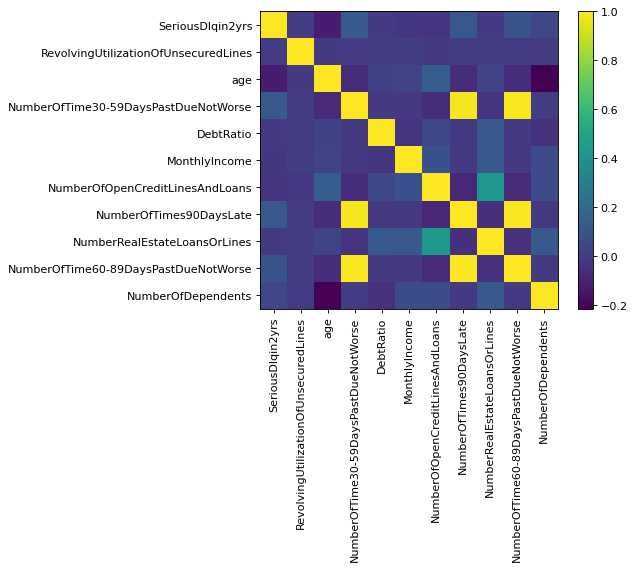

In [ ]:
#heat map
plt.figure(num=None,  dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.show()

C:\Users\Teclab1\AppData\Local\Temp\ipykernel_18648\2569012813.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = pd.plotting.scatter_matrix(df_nonan, alpha=0.75, diagonal='kde', ax=axes)


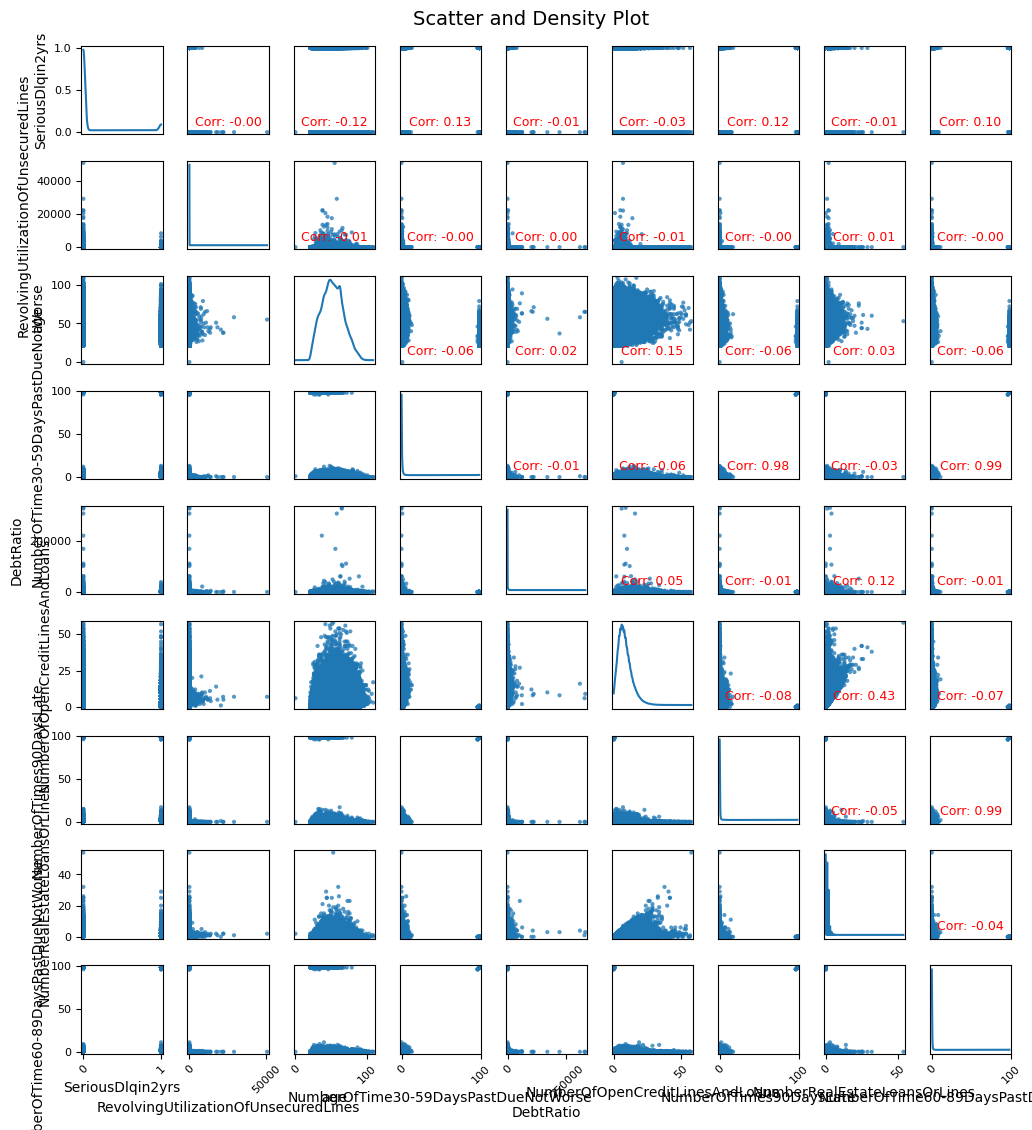

In [ ]:
#scatter map
df_nonan = df.dropna(axis=1)

column_names = list(df_nonan)
df_nonan = df_nonan[column_names]

fig, axes = plt.subplots(figsize=(12, 12))  
axes = pd.plotting.scatter_matrix(df_nonan, alpha=0.75, diagonal='kde', ax=axes)

corrs = df_nonan.corr().values


for i, j in zip(*np.triu_indices_from(corrs, k=1)):
    ax = axes[i, j]
    ax.annotate(f'Corr: {corrs[i, j]:.2f}', 
                xy=(0.5, 0.1), 
                xycoords='axes fraction', 
                ha='center', 
                fontsize=9, 
                color='red')

for ax in axes[-1, :]:  
    ax.xaxis.set_tick_params(rotation=45)
    
for ax in axes[:, 0]:  
    ax.yaxis.set_tick_params(rotation=0)

fig.suptitle('Scatter and Density Plot', fontsize=14)
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)
plt.show()


## Data cleaning and adjusting the skew

    

In [9]:
def remove_outliers_iqr(df, columns, factor=1.5):
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean



In [10]:
cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']
df_data = remove_outliers_iqr(df, cols, factor=1.5)

In [11]:
df_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0


In [12]:
clean_data = df_data.drop(["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate"],axis=1)

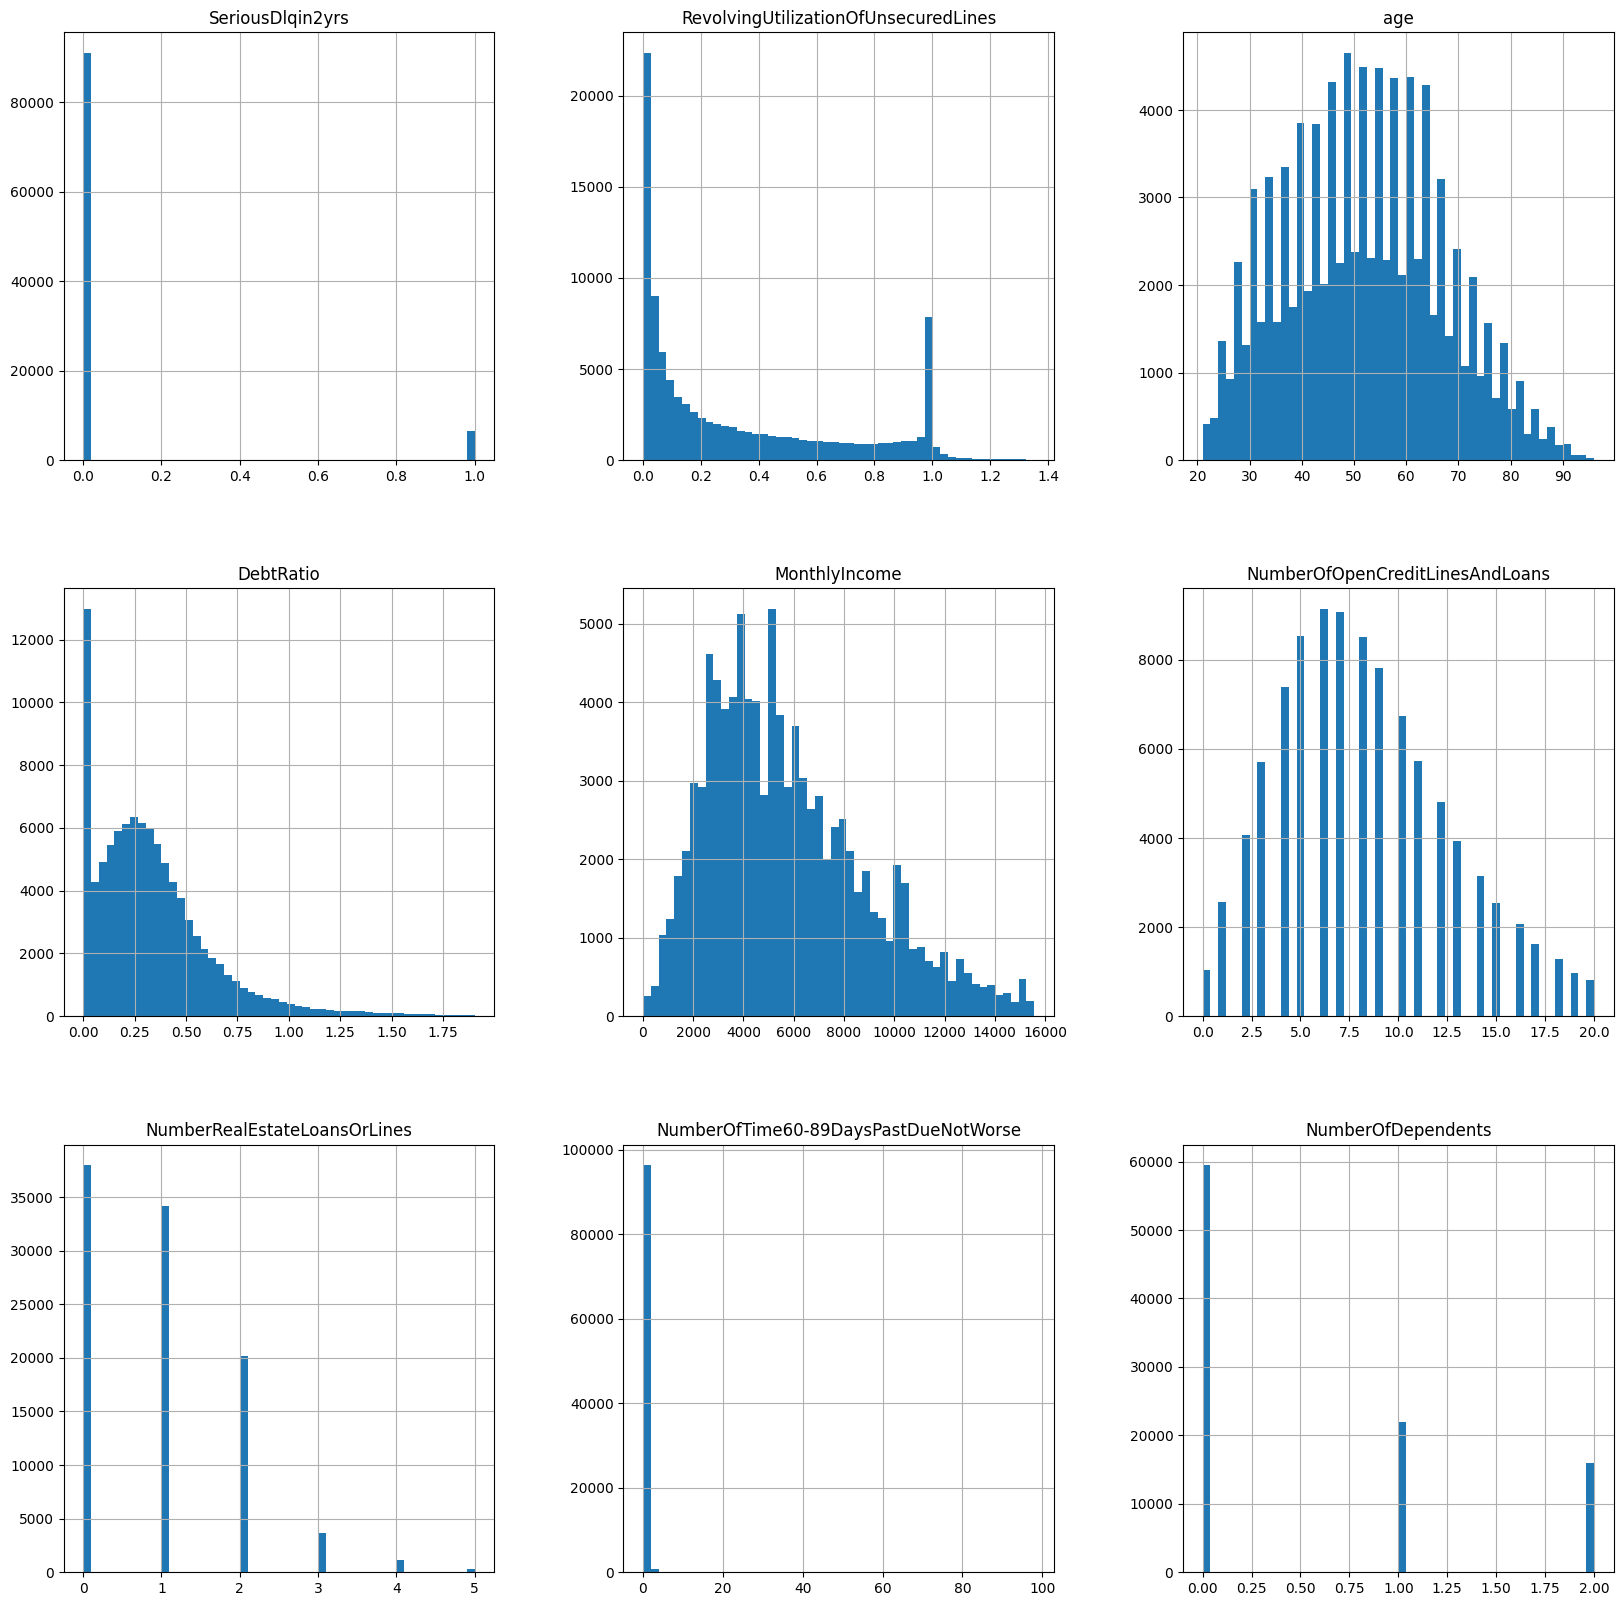

In [13]:
clean_data.hist(bins=50, figsize=(20,20))
plt.show()

In [14]:
print(clean_data.skew())

SeriousDlqin2yrs                         3.486256
RevolvingUtilizationOfUnsecuredLines     0.873587
age                                      0.167165
DebtRatio                                1.575251
MonthlyIncome                            0.761488
NumberOfOpenCreditLinesAndLoans          0.504871
NumberRealEstateLoansOrLines             0.944644
NumberOfTime60-89DaysPastDueNotWorse    25.953356
NumberOfDependents                       0.946058
dtype: float64


In [15]:
clean_data["SeriousDlqin2yrs"].value_counts()


SeriousDlqin2yrs
0    91044
1     6465
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import PowerTransformer

features = clean_data.drop('SeriousDlqin2yrs', axis=1)

pt = PowerTransformer(method = "yeo-johnson")
data_transformed = pt.fit_transform(features)
data_transformed = pd.DataFrame(data = data_transformed, columns = features.columns)
data_transformed['SeriousDlqin2yrs'] = clean_data['SeriousDlqin2yrs'].reset_index(drop=True)
print(data_transformed.skew())

RevolvingUtilizationOfUnsecuredLines    0.283868
age                                    -0.045489
DebtRatio                               0.063180
MonthlyIncome                          -0.004567
NumberOfOpenCreditLinesAndLoans        -0.038096
NumberRealEstateLoansOrLines            0.038503
NumberOfTime60-89DaysPastDueNotWorse    4.102252
NumberOfDependents                      0.501034
SeriousDlqin2yrs                        3.486256
dtype: float64


In [17]:
from imblearn.over_sampling import RandomOverSampler
X= data_transformed.drop('SeriousDlqin2yrs',axis=1)
Y=data_transformed['SeriousDlqin2yrs'].reset_index(drop=True)
ros = RandomOverSampler()
X_rs,Y_rs = ros.fit_resample(X,Y)
data_resampled = pd.DataFrame(X_rs, columns=X.columns)
data_resampled['SeriousDlqin2yrs'] = Y_rs

In [18]:
data_resampled['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    91044
1    91044
Name: count, dtype: int64

## Model training


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_rs, Y_rs, test_size= 0.2, shuffle = True)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [21]:
y_pred = lr_model.predict(x_test)


In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
print(accuracy_score(y_test, y_pred))

0.7449338239332198


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.70      0.73     18094
           1       0.73      0.79      0.76     18324

    accuracy                           0.74     36418
   macro avg       0.75      0.74      0.74     36418
weighted avg       0.75      0.74      0.74     36418



In [24]:
from tabulate import tabulate
coef = lr_model.coef_[0]
odds_ratio = np.exp(coef)
model_info = {'Features': x_train.columns , 'Coefficients': coef, 'Odds ratio': odds_ratio}

print(tabulate(zip(*model_info.values()),headers = model_info.keys()))

Features                                Coefficients    Odds ratio
------------------------------------  --------------  ------------
RevolvingUtilizationOfUnsecuredLines       0.869914       2.38671
age                                       -0.209975       0.810604
DebtRatio                                  0.114136       1.1209
MonthlyIncome                             -0.15699        0.854712
NumberOfOpenCreditLinesAndLoans            0.119786       1.12726
NumberRealEstateLoansOrLines              -0.0374103      0.963281
NumberOfTime60-89DaysPastDueNotWorse       0.428044       1.53425
NumberOfDependents                         0.0674012      1.06972
